In [49]:
library(cosinor)
library(ggplot2)
library(readxl)
library(psych)

In [50]:
my_data <- read_excel("Project.xlsx")

In [51]:
summary(my_data)

   Time_hours         Time                      Average_SBP      Average_DBP   
 Min.   :10.20   Min.   :1899-12-31 00:00:00   Min.   : 98.96   Min.   :58.43  
 1st Qu.:14.05   1st Qu.:1899-12-31 08:18:45   1st Qu.:113.82   1st Qu.:69.90  
 Median :17.90   Median :1899-12-31 13:07:30   Median :117.24   Median :73.00  
 Mean   :17.90   Mean   :1899-12-31 12:48:28   Mean   :116.00   Mean   :71.65  
 3rd Qu.:21.75   3rd Qu.:1899-12-31 17:56:15   3rd Qu.:121.26   3rd Qu.:75.15  
 Max.   :25.60   Max.   :1899-12-31 23:30:00   Max.   :127.06   Max.   :78.55  
 Average_PulseR 
 Min.   :64.72  
 1st Qu.:80.39  
 Median :87.56  
 Mean   :84.84  
 3rd Qu.:91.28  
 Max.   :97.71  

In [52]:
my_data[,1] -> time
my_data[,2] -> time_
my_data[,3] -> Average_SBP
my_data[,4] -> Average_DBP
my_data[,5] -> Average_PulseR

unlist(time, use.names=FALSE) -> time
unlist(Average_SBP, use.names=FALSE) -> Average_SBP
unlist(Average_DBP, use.names=FALSE) -> Average_DBP
unlist(Average_PulseR, use.names=FALSE) -> Average_PulseR

In [53]:
summary (Average_SBP)
summary (Average_DBP)
summary (Average_PulseR)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  98.96  113.82  117.24  116.00  121.26  127.06 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  58.43   69.90   73.00   71.65   75.15   78.55 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  64.72   80.39   87.56   84.84   91.28   97.71 

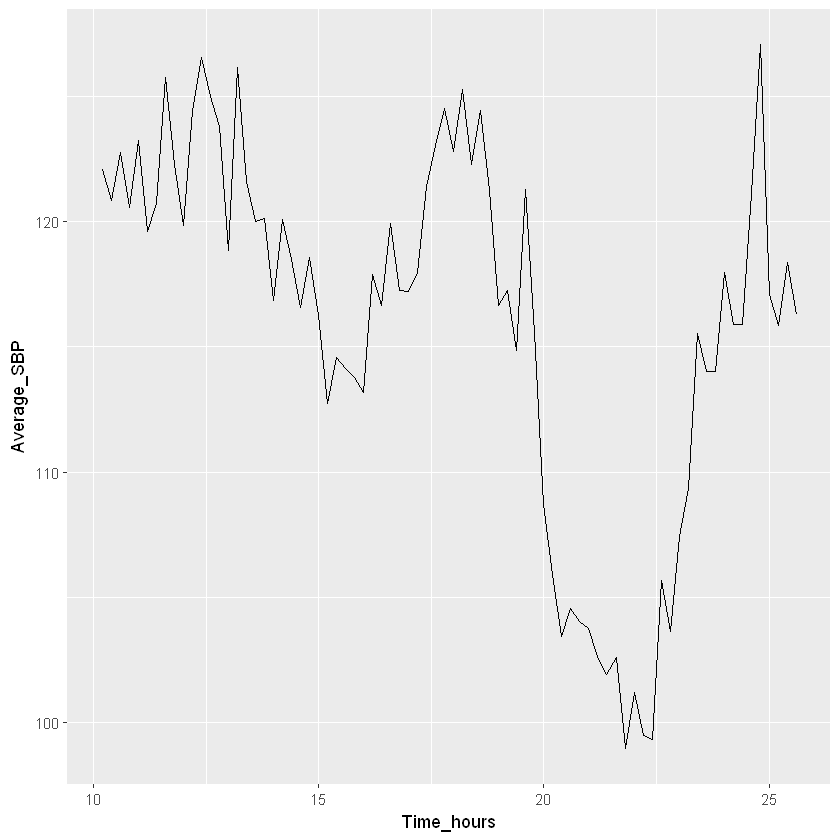

In [54]:
ggplot(my_data , aes(x=Time_hours, y=Average_SBP)) + geom_line()

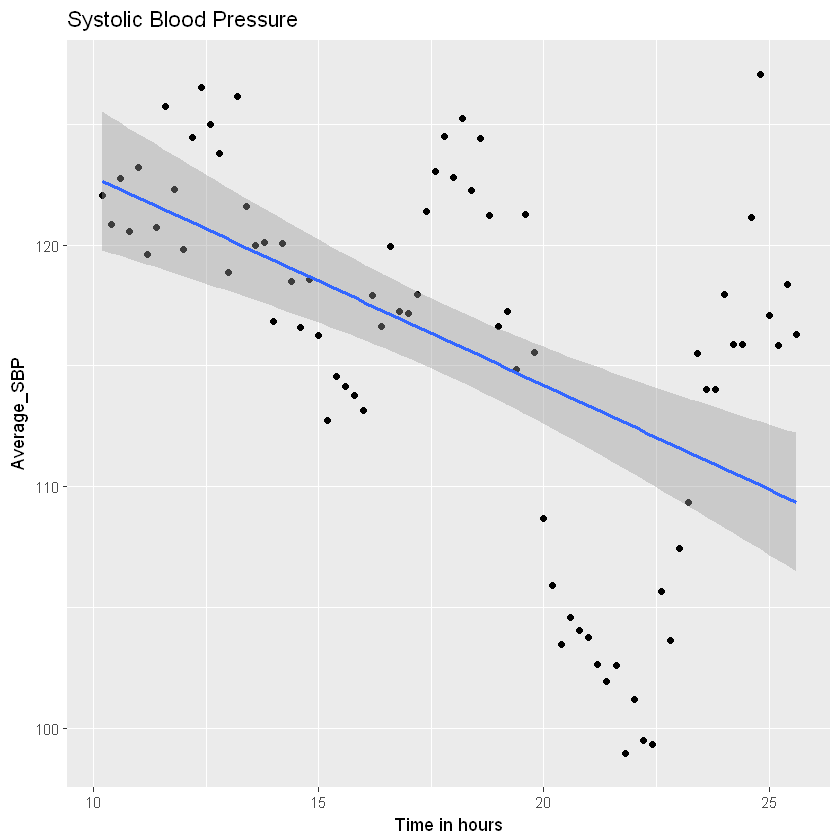

In [55]:
ggplot(my_data , aes(x=Time_hours, y=Average_SBP)) + geom_point() + geom_smooth( se = TRUE, method = "lm") + ggtitle("Systolic Blood Pressure") + xlab("Time in hours")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


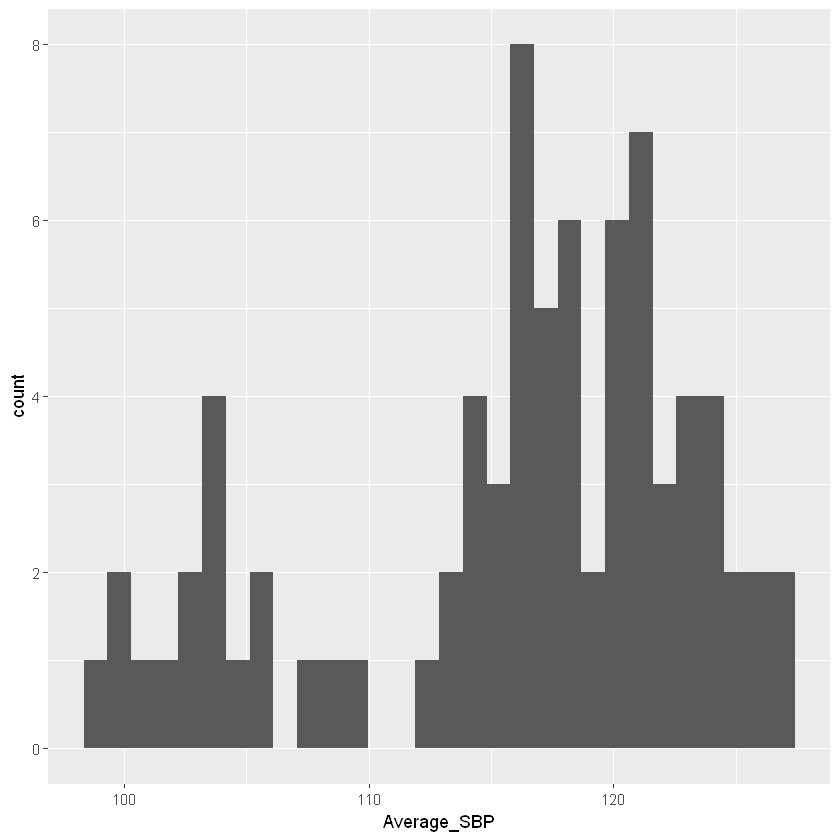

In [56]:
ggplot(my_data , aes(x=Average_SBP)) + geom_histogram()

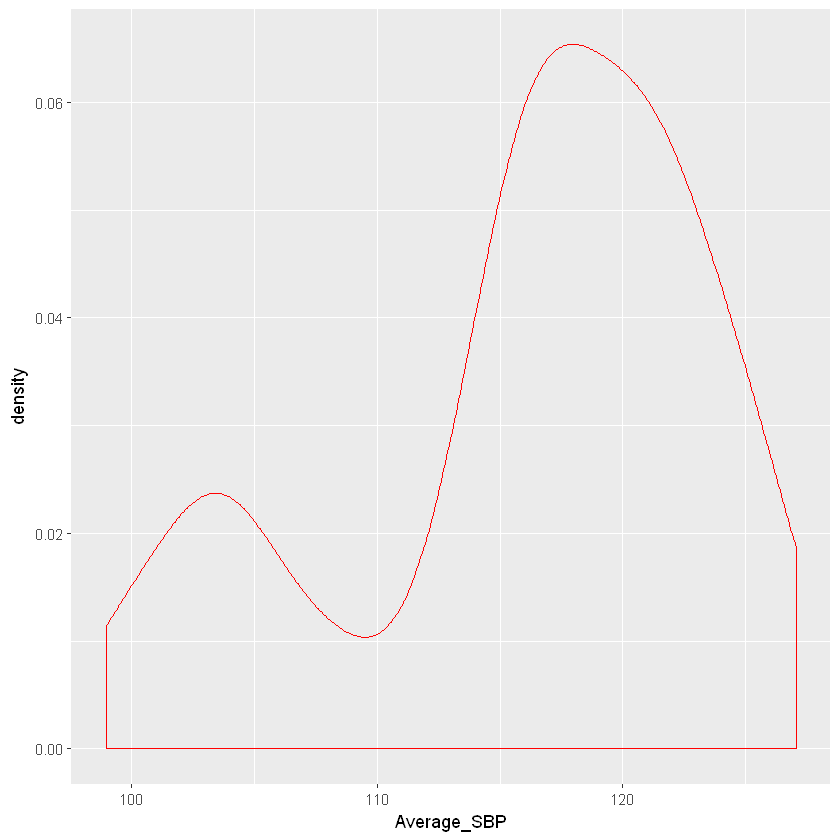

In [57]:
ggplot(my_data , aes(x=Average_SBP)) + geom_density( color = "RED")

,phase,fit,amplitude,sd,mean,intercept
x,10.82128,0.6190195,0.6184026,7.466629,116.0037,111.6044


      time        Average_SBP    
 Min.   :10.20   Min.   : 98.96  
 1st Qu.:14.05   1st Qu.:113.82  
 Median :17.90   Median :117.24  
 Mean   :17.90   Mean   :116.00  
 3rd Qu.:21.75   3rd Qu.:121.26  
 Max.   :25.60   Max.   :127.06  

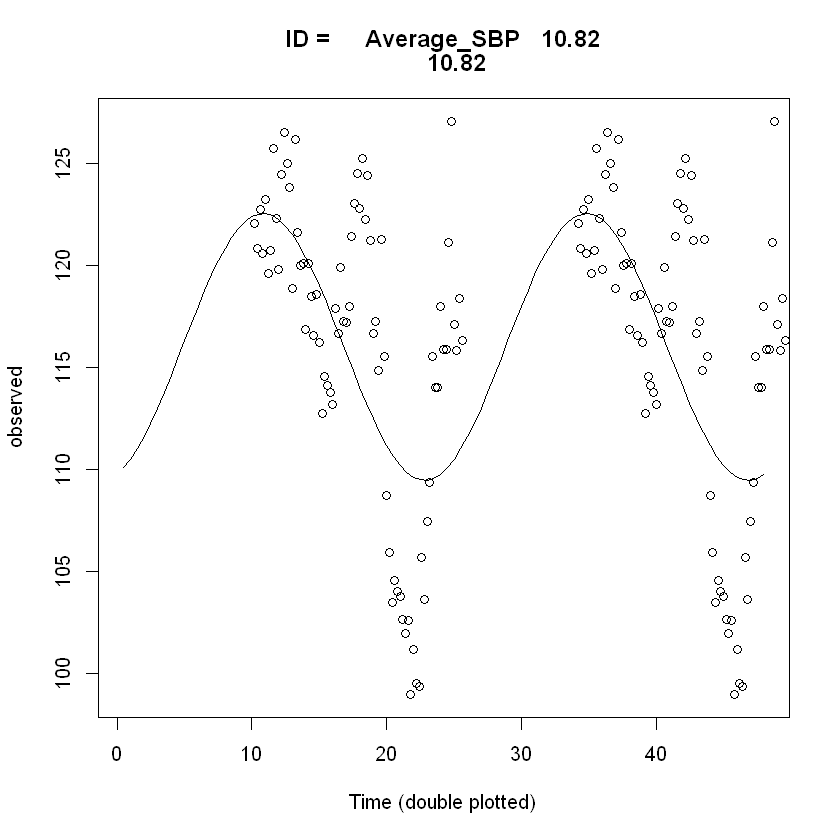

In [58]:
cosinor(time,Average_SBP)

timeTemp2 <- data.frame(time,Average_SBP)
summary(timeTemp2)

cosinor.plot("time","Average_SBP",data=timeTemp2)

In [59]:
#predict(fit)

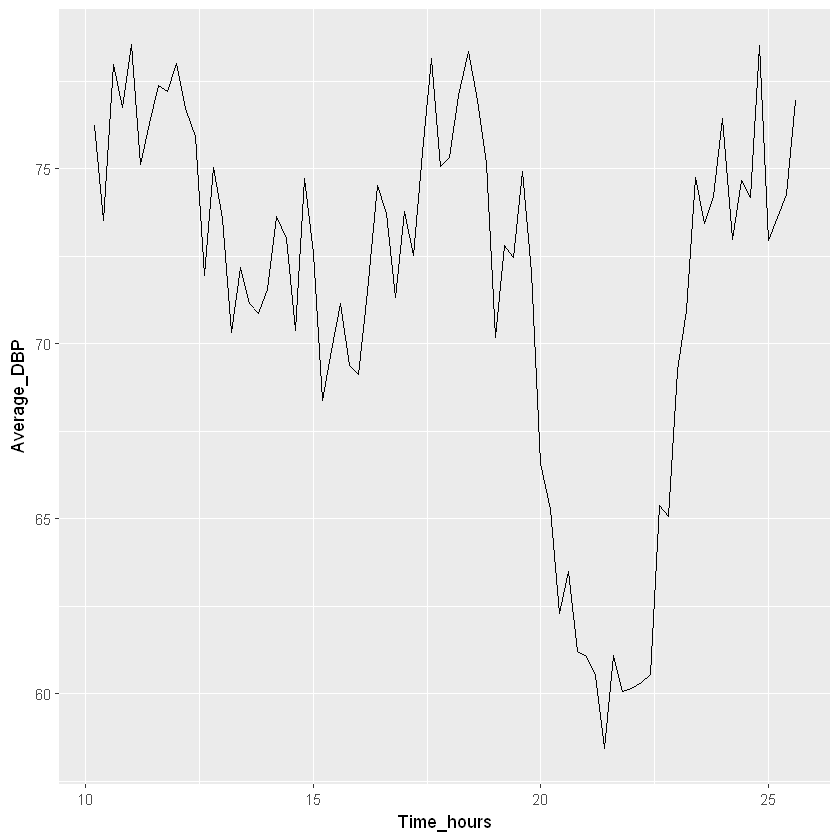

In [60]:
ggplot(my_data , aes(x=Time_hours, y=Average_DBP)) + geom_line()

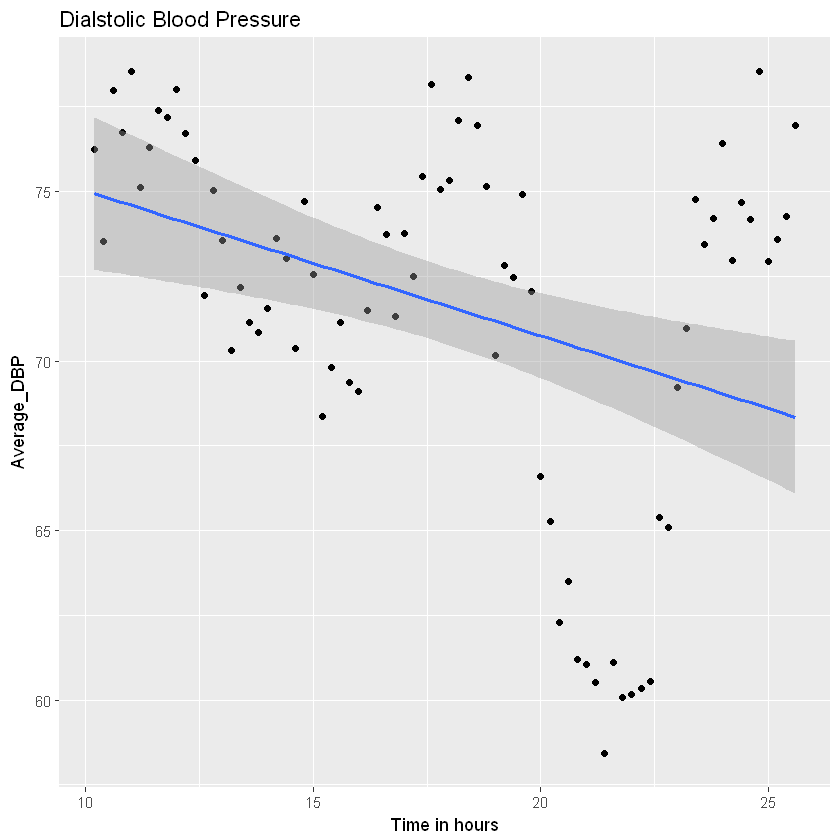

In [61]:
ggplot(my_data , aes(x=Time_hours, y=Average_DBP)) + geom_point() + geom_smooth( se = TRUE, method = "lm") + ggtitle("Dialstolic Blood Pressure") + xlab("Time in hours")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


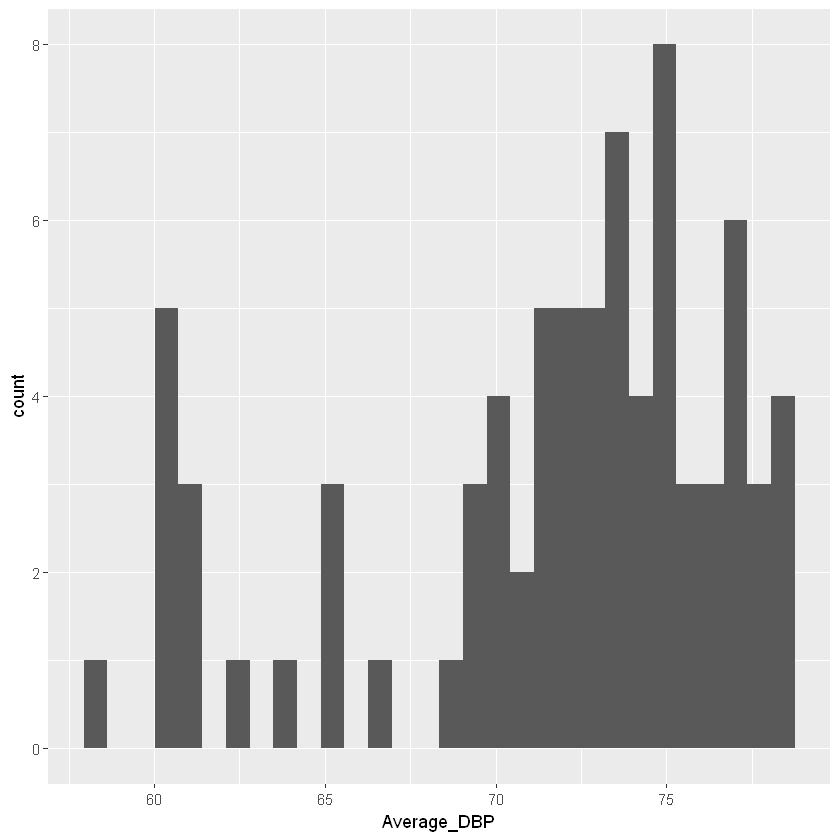

In [62]:
ggplot(my_data , aes(x=Average_DBP)) + geom_histogram()

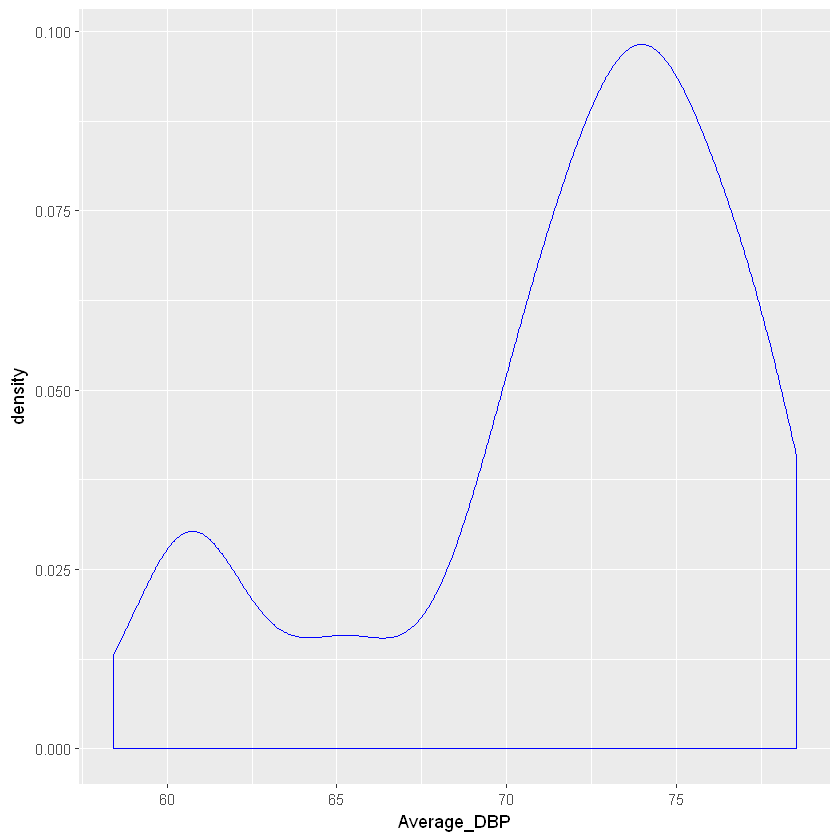

In [63]:
ggplot(my_data , aes(x=Average_DBP)) + geom_density( color = "BLUE")

,phase,fit,amplitude,sd,mean,intercept
x,9.655768,0.5048139,0.5096252,5.364625,71.64579,69.41075


      time        Average_DBP   
 Min.   :10.20   Min.   :58.43  
 1st Qu.:14.05   1st Qu.:69.90  
 Median :17.90   Median :73.00  
 Mean   :17.90   Mean   :71.65  
 3rd Qu.:21.75   3rd Qu.:75.15  
 Max.   :25.60   Max.   :78.55  

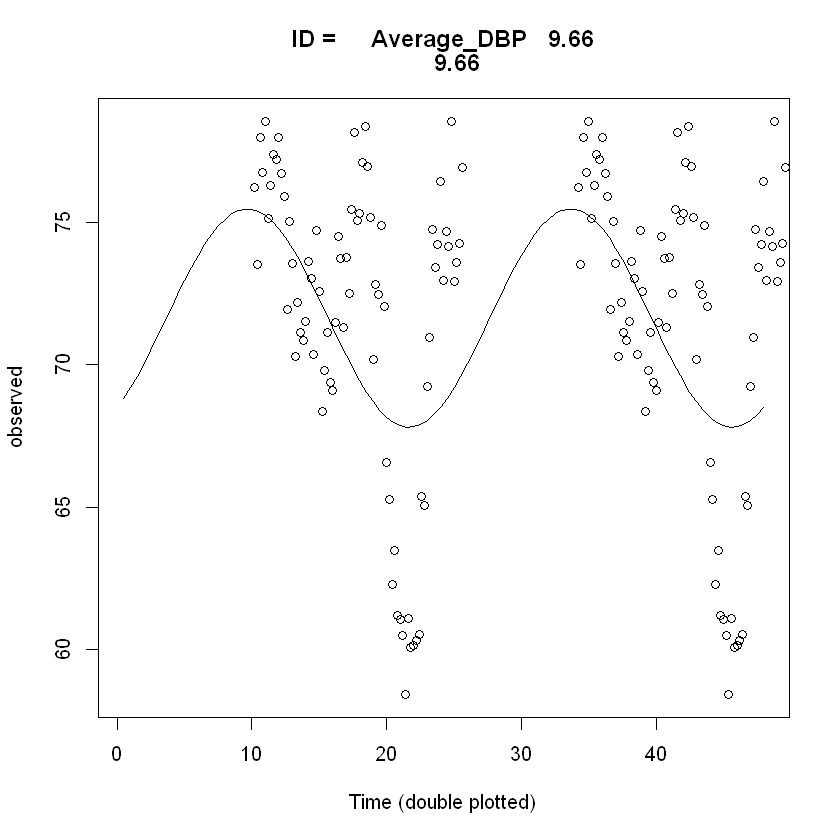

In [64]:
cosinor(time,Average_DBP)

timeTemp3 <- data.frame(time,Average_DBP)
summary(timeTemp3)

cosinor.plot("time","Average_DBP",data=timeTemp3)

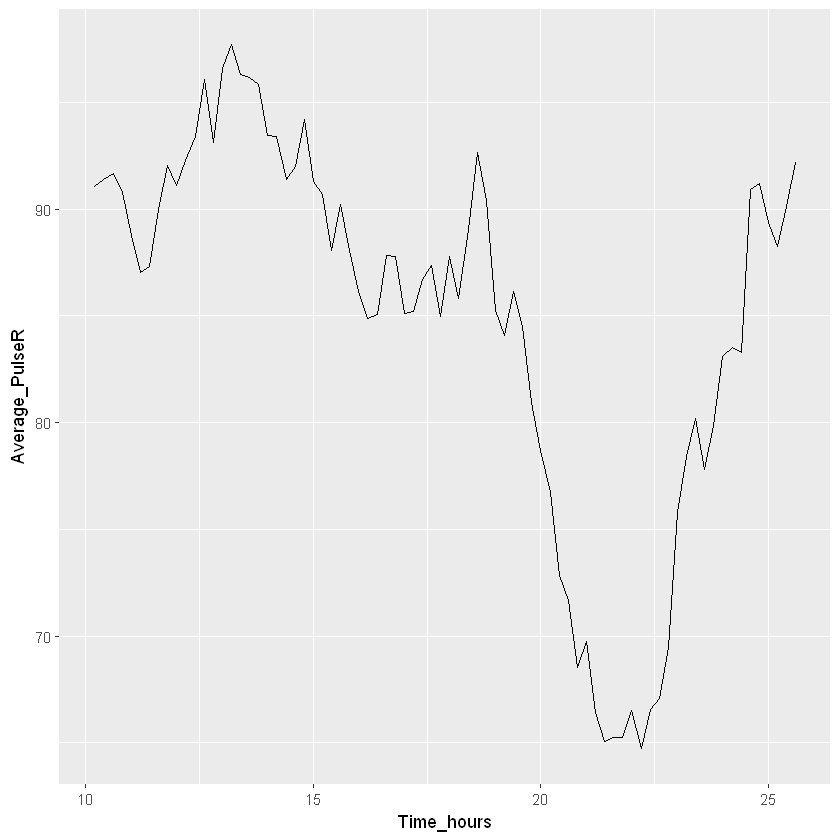

In [65]:
ggplot(my_data , aes(x=Time_hours, y=Average_PulseR)) + geom_line()

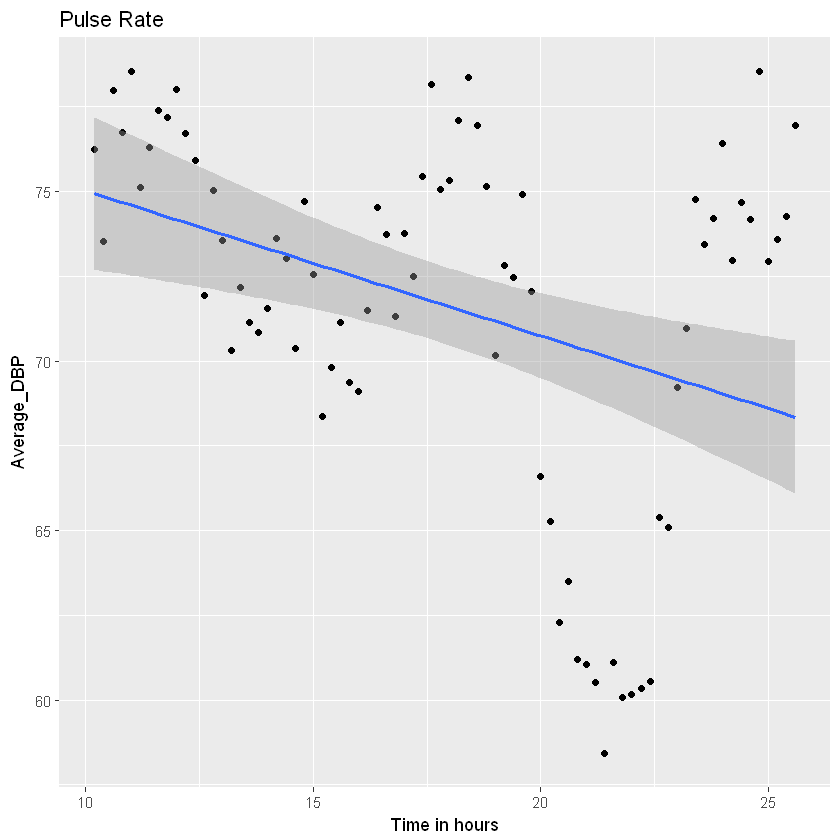

In [66]:
ggplot(my_data , aes(x=Time_hours, y=Average_DBP)) + geom_point() + geom_smooth( se = TRUE, method = "lm") + ggtitle("Pulse Rate") + xlab("Time in hours")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


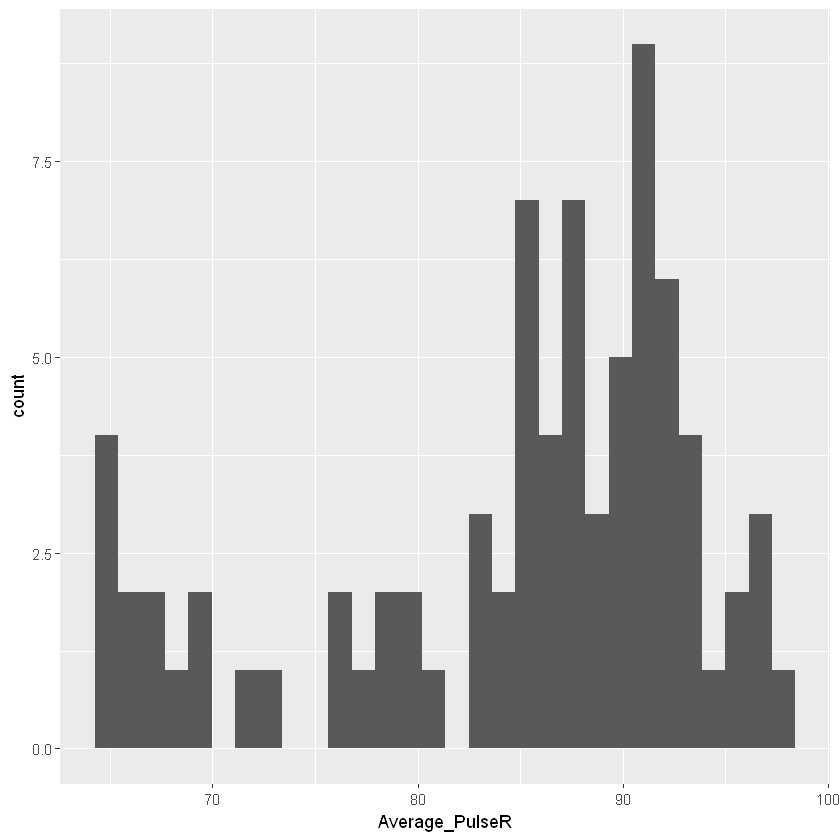

In [67]:
ggplot(my_data , aes(x=Average_PulseR)) + geom_histogram()

,phase,fit,amplitude,sd,mean,intercept
x,10.98265,0.7207861,0.7195362,9.111246,84.84006,78.51534


      time       Average_PulseR 
 Min.   :10.20   Min.   :64.72  
 1st Qu.:14.05   1st Qu.:80.39  
 Median :17.90   Median :87.56  
 Mean   :17.90   Mean   :84.84  
 3rd Qu.:21.75   3rd Qu.:91.28  
 Max.   :25.60   Max.   :97.71  

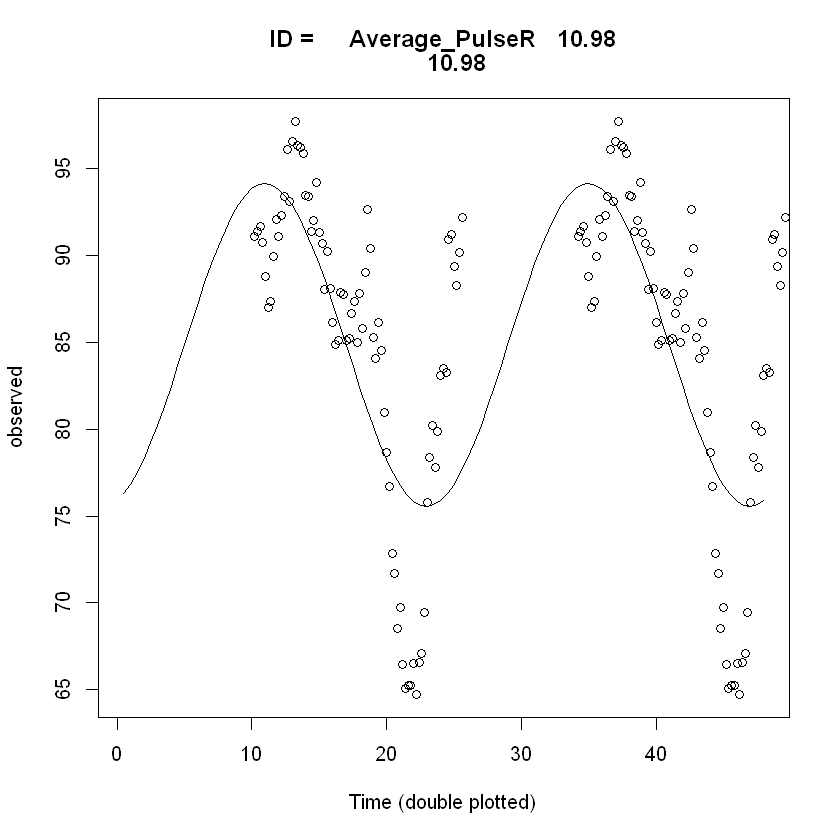

In [68]:
cosinor(time,Average_PulseR)

timeTemp3 <- data.frame(time,Average_PulseR)
summary(timeTemp3)

cosinor.plot("time","Average_PulseR",data=timeTemp3)

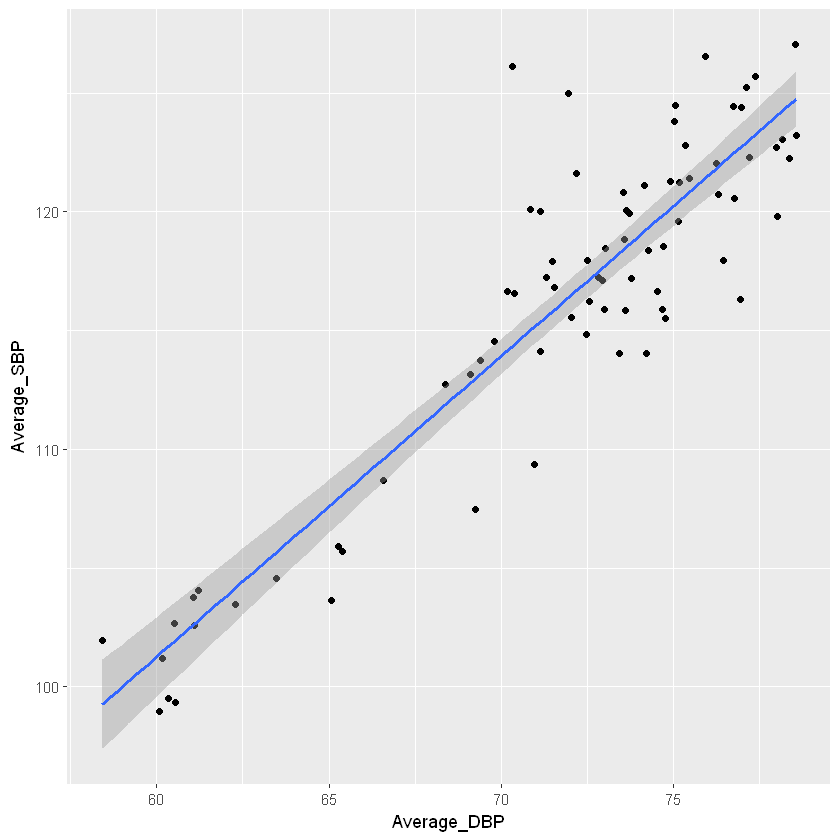

In [69]:
#Correlation
ggplot(my_data , aes(x=Average_DBP, y=Average_SBP)) + geom_point() + geom_smooth( se = TRUE, method = "lm")

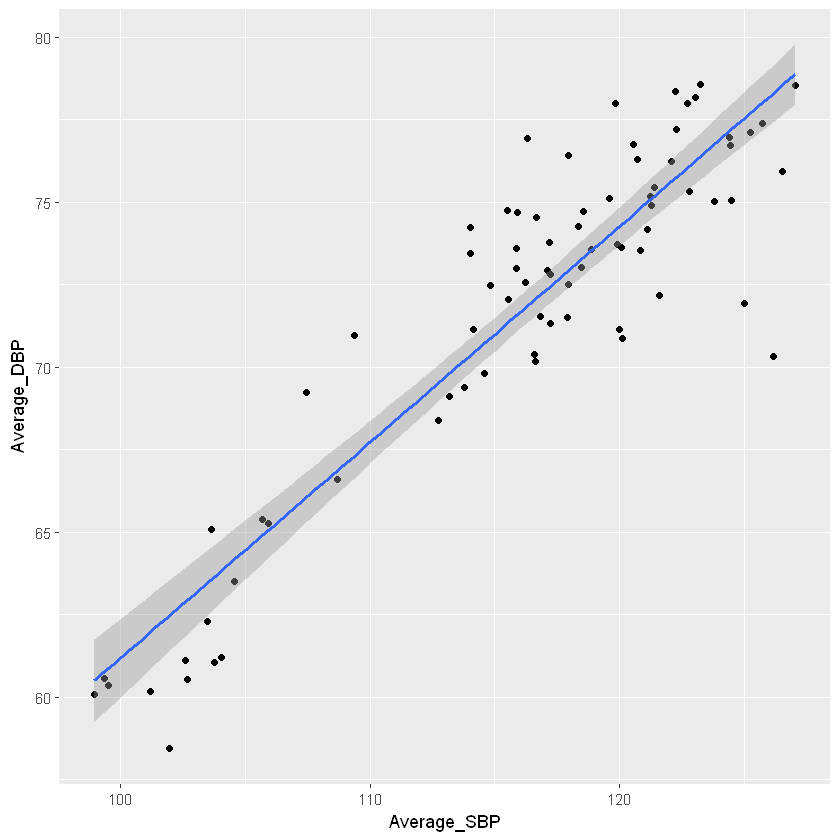

In [70]:
ggplot(my_data , aes(x=Average_SBP, y=Average_DBP)) + geom_point() + geom_smooth( se = TRUE, method = "lm")

In [71]:
str(time)
str(Average_SBP)
#data frame
#time<- c(2, 6, 10, 18, 22, 26, 30, 34, 38)
#resp<- c(2.54, 0.13, -0.38, -0.57,  0.11, -0.20, -0.26, -0.62, -0.73)
df<-data.frame(time,Average_SBP)
head(df)
#summary(my_data$Time)

 num [1:78] 10.2 10.4 10.6 10.8 11 11.2 11.4 11.6 11.8 12 ...
 num [1:78] 122 121 123 121 123 ...


time,Average_SBP
10.2,122.0588
10.4,120.8367
10.6,122.7347
10.8,120.5600
11.0,123.2200
11.2,119.5882


Raw model coefficients:
                estimate standard.error lower.CI upper.CI p.value
(Intercept)      37.6866        12.1723  13.8293  61.5439  0.0020
Average_SBP      -0.1739         0.1027  -0.3751   0.0274  0.0904
rrr              41.0593        13.0549  15.4722  66.6464  0.0017
sss              -9.7411        15.8005 -40.7095  21.2274  0.5376
Average_SBP:rrr  -0.3465         0.1098  -0.5617  -0.1313  0.0016
Average_SBP:sss   0.0850         0.1368  -0.1830   0.3531  0.5342

***********************

Transformed coefficients:
                      estimate standard.error lower.CI upper.CI p.value
(Intercept)            37.6866        12.1723  13.8293  61.5439  0.0020
[Average_SBP = 1]      -0.1739         0.1027  -0.3751   0.0274  0.0904
amp                    42.1990        13.6991  15.3492  69.0487  0.0021
[Average_SBP = 1]:amp  41.8422        13.5833  15.2194  68.4650  0.0021
acr                    -0.2329         0.3613  -0.9410   0.4751  0.5191
[Average_SBP = 1]:acr  -0.2329

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.35   35.05   36.95   37.69   39.21   49.17 

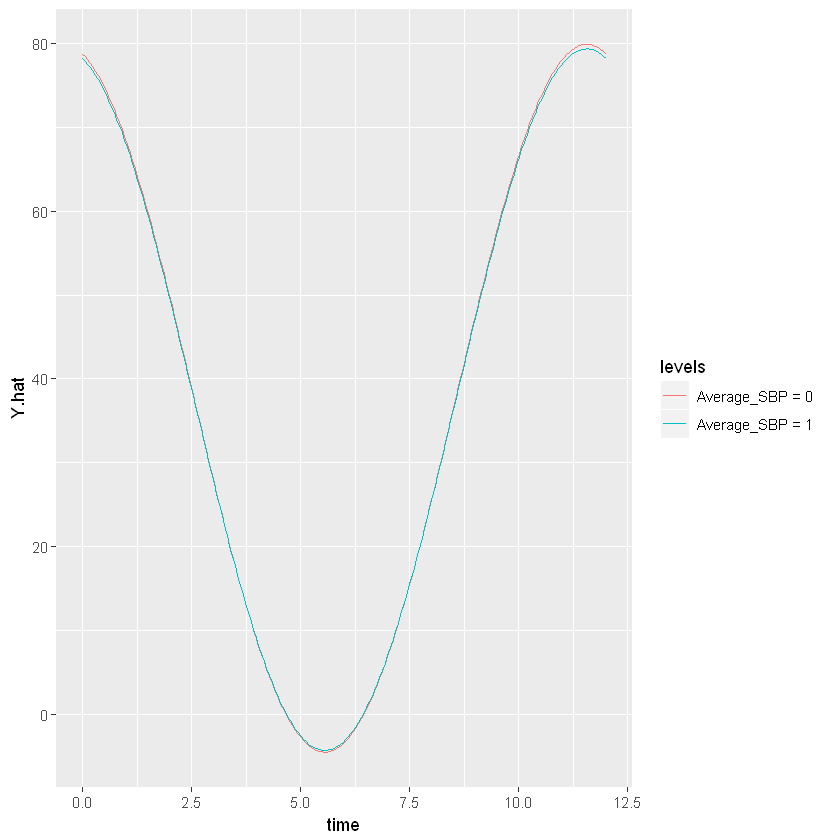

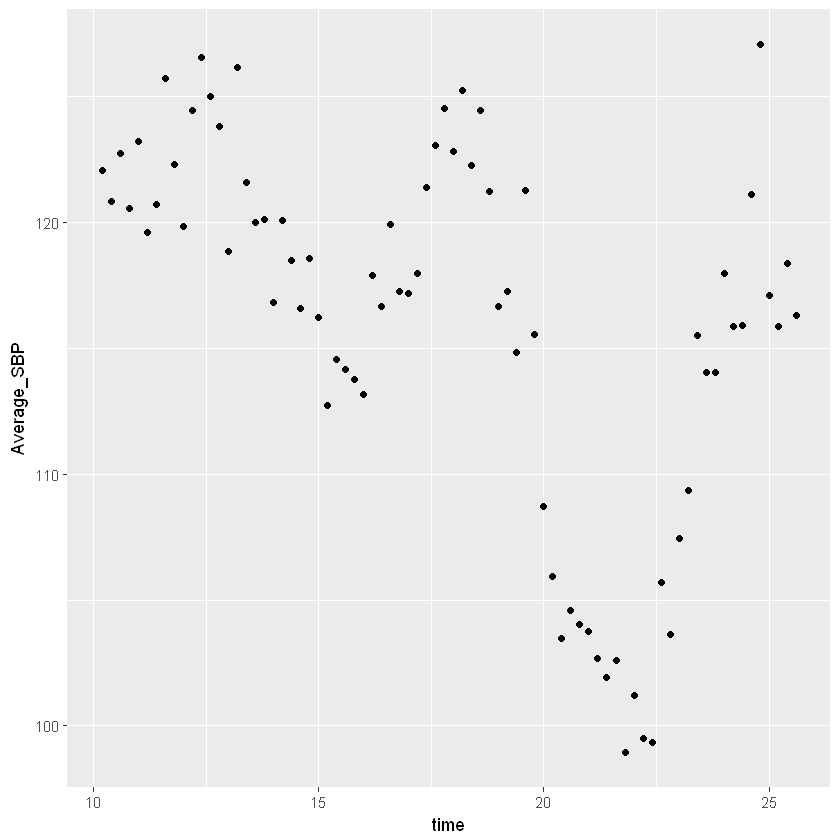

In [82]:
fit <- cosinor.lm(time ~ time(time) + Average_SBP + amp.acro(Average_SBP), data = df)
summary(fit)
#test_cosinor(fit, "time", param = "Average_SBP")
summary(predict(fit))
#ggplot.cosinor.lm(fit, x_str = "time") 
#(ggplot(vitamind , aes(x=time, y=Average_SBP)) + geom_point())
ggplot.cosinor.lm(fit, x_str = "Average_SBP") 
ggplot(df , aes(x=time, y=Average_SBP)) + geom_point()

In [83]:
# data fits both linear and cosinor models (but not very well)
#cos.model <- cosinor.lm(time ~ time(time), period=24, data=df)
#fit <- cosinor.lm(time ~ time(time) + Average_SBP + amp.acro(Average_SBP), data = df)
#summary(fit)
#test_cosinor(fit, "time", param = "Average_SBP")
#summary(predict(fit))
#ggplot.cosinor.lm(fit, x_str = "time") 
#(ggplot(vitamind , aes(x=time, y=Average_SBP)) + geom_point())
#ggplot.cosinor.lm(fit, x_str = "Average_SBP") 
#ggplot(df , aes(x=time, y=Average_SBP)) + geom_point()


In [84]:
#summary(cos.model)
#l.model <- lm(resp ~ time, data=df)
#summary(l.model)

#plot with a loess smoother looks like a combination of the models 
#plot to see fit

#ggplot(df, aes(x = time, y = resp))+
#  geom_point()+
#  geom_smooth(method = "lm", se = FALSE)

In [85]:
#fit <- cosinor.lm(time ~ time(time) + X + amp.acro(Average_SBP), data = df, period = 12)
#summary(fit)
#test_cosinor(fit, "Average_SBP", param = "amp")
#summary(vitamind$Y)
#summary(predict(fit))
#ggplot.cosinor.lm(fit, x_str = "X") 
#(ggplot(vitamind , aes(x=X, y=time)) + geom_point())


In [86]:

#library(cosinor)
#fit <- cosinor.lm(Y ~ time(time) + X + amp.acro(X), data = vitamind, period = 12)
#summary(fit)
#test_cosinor(fit, "X", param = "amp")
#summary(vitamind$Y)
#summary(predict(fit))
#library(ggplot2)
#summary(vitamind)
#ggplot.cosinor.lm(fit, x_str = "X") 
#(ggplot(vitamind , aes(x=X, y=time)) + geom_point())


In [87]:
#Time=c(1,2,3,4,24)     #add more times 
#Rectal=c(33.8,37.6,37.1,35.5,38.2)  #add more temperatures 
#cosinor(Time,Rectal)
#timeTemp <- data.frame(Time,Rectal)
#cosinor.plot("Time","Rectal",data=timeTemp)

In [88]:
#str(vitamind)
#cosinor.plot("time","X",data=timeTemp2,)
#fit <- cosinor.lm(Time_hours ~ time(Time_hours) + Average_SBP+ amp.acro(Average_SBP), data = my_data)
#cosinor_analyzer(data = vitamind)
#str(vitamind)